# ADS 508 Final Project

Christopher Garcia, Claire Phibbs, and Christine Vu

Shiley-Marcos School of Engineering, University of San Diego

ADS 508: Data Science with Cloud Computing

Professor Jules Malin

April 17, 2023

***

## Schema
**diabetes_012_health_indicators_BRFSS2015:**
- `Diabetes_012`: 0 = no diabetes, 1 = prediabetes, and 2 = diabetes.
- `HighBP`: 0 = no high BP and 1 = high BP.
- `HighChol`: 0 = no high cholesterol and 1 = high cholesterol.
- `CholCheck`: 0 = no cholesterol check in 5 years and 1 = yes cholesterol check in 5 years.
- `BMI`: Body Mass Index.
- `Smoker`: Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] 0 = no and 1 = yes.
- `Stroke`: (Ever told) you had a stroke. 0 = no and 1 = yes.
- `HeartDiseaseorAttack`: Coronary heart disease (CHD) or myocardial infarction (MI). 0 = no and 1 = yes.
- `PhysActivity`: Physical activity in past 30 days, not including job. 0 = no and 1 = yes.
- `Fruits`: Consume Fruit 1 or more times per day. 0 = no and 1 = yes.

**diabetes_binary_5050split_health_indicators_BRFSS2015 & diabetes_binary_health_indicators_BRFSS2015:**
- `Diabetes_012`: 0 = no diabetes, 1 = prediabetes or diabetes.
- `HighBP`: 0 = no high BP and 1 = high BP.
- `HighChol`: 0 = no high cholesterol and 1 = high cholesterol.
- `CholCheck`: 0 = no cholesterol check in 5 years and 1 = yes cholesterol check in 5 years.
- `BMI`: Body Mass Index.
- `Smoker`: Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] 0 = no and 1 = yes.
- `Stroke`: (Ever told) you had a stroke. 0 = no and 1 = yes.
- `HeartDiseaseorAttack`: Coronary heart disease (CHD) or myocardial infarction (MI). 0 = no and 1 = yes.
- `PhysActivity`: Physical activity in past 30 days, not including job. 0 = no and 1 = yes.
- `Fruits`: Consume Fruit 1 or more times per day. 0 = no and 1 = yes.
***

## Data Importing and Pre-processing

In [3]:
# Import required packages
import boto3
import sagemaker
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import math
import requests
import io
import os
import csv
import warnings
warnings.filterwarnings('ignore')

In [4]:
# github_to_pandas: Function to pull raw CSV from GitHub and convert to Pandas Dataframe object
def github_to_pandas(raw_git_url):
    # Pull Raw CSV File from GitHub
    file_name = str(raw_git_url)
    pull_file = requests.get(file_name).content
    csv_df = pd.read_csv(io.StringIO(pull_file.decode('utf-8')))
    return csv_df

# Pull CSV files from GitHub and convert to Pandas Dataframe
diabetes_012_health_indicators_BRFSS2015 = github_to_pandas("https://raw.githubusercontent.com/ChrisGarciaDS/ADS-508-Team-Final-Project/main/data/diabetes_012_health_indicators_BRFSS2015.csv")
diabetes_binary_5050split_health_indicators_BRFSS2015 = github_to_pandas("https://raw.githubusercontent.com/ChrisGarciaDS/ADS-508-Team-Final-Project/main/data/diabetes_binary_5050split_health_indicators_BRFSS2015.csv")
diabetes_binary_health_indicators_BRFSS2015 = github_to_pandas("https://raw.githubusercontent.com/ChrisGarciaDS/ADS-508-Team-Final-Project/main/data/diabetes_binary_health_indicators_BRFSS2015.csv")

print("CSV Files from GitHub Loaded into Pandas DataFrames")

CSV Files from GitHub Loaded into Pandas DataFrames


#### diabetes_012_health_indicators_BRFSS2015 CSV

In [5]:
diabetes_012_health_indicators_BRFSS2015.head(3)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0


In [6]:
# Key statistics of studied variables
diabetes_012_health_indicators_BRFSS2015.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


#### diabetes_binary_5050split_health_indicators_BRFSS2015 CSV

In [7]:
diabetes_binary_5050split_health_indicators_BRFSS2015.head(3)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0


In [8]:
# Key statistics of studied variables
diabetes_binary_5050split_health_indicators_BRFSS2015.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,...,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,...,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,...,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


#### diabetes_binary_health_indicators_BRFSS2015 CSV

In [9]:
diabetes_binary_health_indicators_BRFSS2015.head(3)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0


In [10]:
# Key statistics of studied variables
diabetes_binary_health_indicators_BRFSS2015.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [11]:
# Shape of dataframes
print("Diabetes Shape:", diabetes_012_health_indicators_BRFSS2015.shape)
print("Diabetes 50/50 Split Shape:", diabetes_binary_5050split_health_indicators_BRFSS2015.shape)
print("Diabetes Binary Shape:", diabetes_binary_health_indicators_BRFSS2015.shape)

Diabetes Shape: (253680, 22)
Diabetes 50/50 Split Shape: (70692, 22)
Diabetes Binary Shape: (253680, 22)


In [12]:
# Find missing values
print("Diabetes Missing Values:")
for col in diabetes_012_health_indicators_BRFSS2015.columns:
    print('\t%s: %d' % (col, diabetes_012_health_indicators_BRFSS2015[col].isna().sum()))

print("\nDiabetes 50/50 Split Missing Values:")
for col in diabetes_binary_5050split_health_indicators_BRFSS2015.columns:
    print('\t%s: %d' % (col, diabetes_binary_5050split_health_indicators_BRFSS2015[col].isna().sum()))

print("\nDiabetes Binary Missing Values:")
for col in diabetes_binary_health_indicators_BRFSS2015.columns:
    print('\t%s: %d' % (col, diabetes_binary_health_indicators_BRFSS2015[col].isna().sum()))

Diabetes Missing Values:
	Diabetes_012: 0
	HighBP: 0
	HighChol: 0
	CholCheck: 0
	BMI: 0
	Smoker: 0
	Stroke: 0
	HeartDiseaseorAttack: 0
	PhysActivity: 0
	Fruits: 0
	Veggies: 0
	HvyAlcoholConsump: 0
	AnyHealthcare: 0
	NoDocbcCost: 0
	GenHlth: 0
	MentHlth: 0
	PhysHlth: 0
	DiffWalk: 0
	Sex: 0
	Age: 0
	Education: 0
	Income: 0

Diabetes 50/50 Split Missing Values:
	Diabetes_binary: 0
	HighBP: 0
	HighChol: 0
	CholCheck: 0
	BMI: 0
	Smoker: 0
	Stroke: 0
	HeartDiseaseorAttack: 0
	PhysActivity: 0
	Fruits: 0
	Veggies: 0
	HvyAlcoholConsump: 0
	AnyHealthcare: 0
	NoDocbcCost: 0
	GenHlth: 0
	MentHlth: 0
	PhysHlth: 0
	DiffWalk: 0
	Sex: 0
	Age: 0
	Education: 0
	Income: 0

Diabetes Binary Missing Values:
	Diabetes_binary: 0
	HighBP: 0
	HighChol: 0
	CholCheck: 0
	BMI: 0
	Smoker: 0
	Stroke: 0
	HeartDiseaseorAttack: 0
	PhysActivity: 0
	Fruits: 0
	Veggies: 0
	HvyAlcoholConsump: 0
	AnyHealthcare: 0
	NoDocbcCost: 0
	GenHlth: 0
	MentHlth: 0
	PhysHlth: 0
	DiffWalk: 0
	Sex: 0
	Age: 0
	Education: 0
	Income: 0


In [13]:
# Data types of all columns
print("Diabetes Data Types:\n", diabetes_012_health_indicators_BRFSS2015.dtypes)
print("\nDiabetes 50/50 Split Data Types:\n", diabetes_binary_5050split_health_indicators_BRFSS2015.dtypes)
print("\nDiabetes Binary Data Types:\n", diabetes_binary_health_indicators_BRFSS2015.dtypes)

Diabetes Data Types:
 Diabetes_012            float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

Diabetes 50/50 Split Data Types:
 Diabetes_binary         float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
H

In [14]:
# Duplicated data
print("Diabetes Duplicated Values:", diabetes_012_health_indicators_BRFSS2015.duplicated().sum())
print("Diabetes 50/50 Split Duplicated Values:", diabetes_binary_5050split_health_indicators_BRFSS2015.duplicated().sum())
print("Diabetes Binary Duplicated Values:", diabetes_binary_health_indicators_BRFSS2015.duplicated().sum())

Diabetes Duplicated Values: 23899
Diabetes 50/50 Split Duplicated Values: 1635
Diabetes Binary Duplicated Values: 24206


In [15]:
# Class Proportions: Check for balanced target class (Diabetes_012 / Diabetes_binary)

# Diabetes: Determine if 'Diabetes_012' column is balanced
# Diabetes_012: 0 = no diabetes, 1 = prediabetes, 2 = diabetes
print("Diabetes:\n", diabetes_012_health_indicators_BRFSS2015['Diabetes_012'].value_counts())
print(diabetes_012_health_indicators_BRFSS2015['Diabetes_012'].value_counts() / diabetes_012_health_indicators_BRFSS2015.shape[0] * 100)

# Diabetes 50/50 Split: Determine if 'Diabetes_binary' column is balanced
# Diabetes_binary: 0 = no diabetes, 1 = prediabetes or diabetes
print("\nDiabetes 50/50 Split:\n", diabetes_binary_5050split_health_indicators_BRFSS2015['Diabetes_binary'].value_counts())
print(diabetes_binary_5050split_health_indicators_BRFSS2015['Diabetes_binary'].value_counts() / diabetes_binary_5050split_health_indicators_BRFSS2015.shape[0] * 100)

# Diabetes Binary: Determine if 'Diabetes_binary' column is balanced
# Diabetes_binary: 0 = no diabetes, 1 = prediabetes or diabetes
print("\nDiabetes Binary:\n", diabetes_binary_health_indicators_BRFSS2015['Diabetes_binary'].value_counts())
print(diabetes_binary_health_indicators_BRFSS2015['Diabetes_binary'].value_counts() / diabetes_binary_health_indicators_BRFSS2015.shape[0] * 100)

Diabetes:
 0.0    213703
2.0     35346
1.0      4631
Name: Diabetes_012, dtype: int64
0.0    84.241170
2.0    13.933302
1.0     1.825528
Name: Diabetes_012, dtype: float64

Diabetes 50/50 Split:
 0.0    35346
1.0    35346
Name: Diabetes_binary, dtype: int64
0.0    50.0
1.0    50.0
Name: Diabetes_binary, dtype: float64

Diabetes Binary:
 0.0    218334
1.0     35346
Name: Diabetes_binary, dtype: int64
0.0    86.066698
1.0    13.933302
Name: Diabetes_binary, dtype: float64


***
## Exploratory Data Analysis
* Bar plot: Distribution of diabetes
* Bar plot: Diabetes by predictor variables
* Box plot: Variables' outliers
* Heatmap: Correlation between all variables

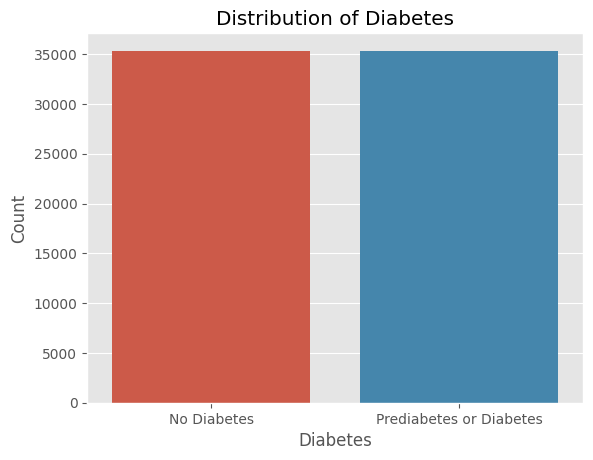

In [17]:
# Bar plot: Distribution of diabetes
# Get the count of diabetes values
diabetes_count = diabetes_binary_5050split_health_indicators_BRFSS2015['Diabetes_binary'].value_counts()

# Create a bar plot
fig, ax = plt.subplots()
sns.barplot(x = diabetes_count.index, y = diabetes_count.values, ax = ax)
ax.set_xticklabels(['No Diabetes', 'Prediabetes or Diabetes'])
ax.set_xlabel('Diabetes')
ax.set_ylabel('Count')
ax.set_title('Distribution of Diabetes')
plt.show()

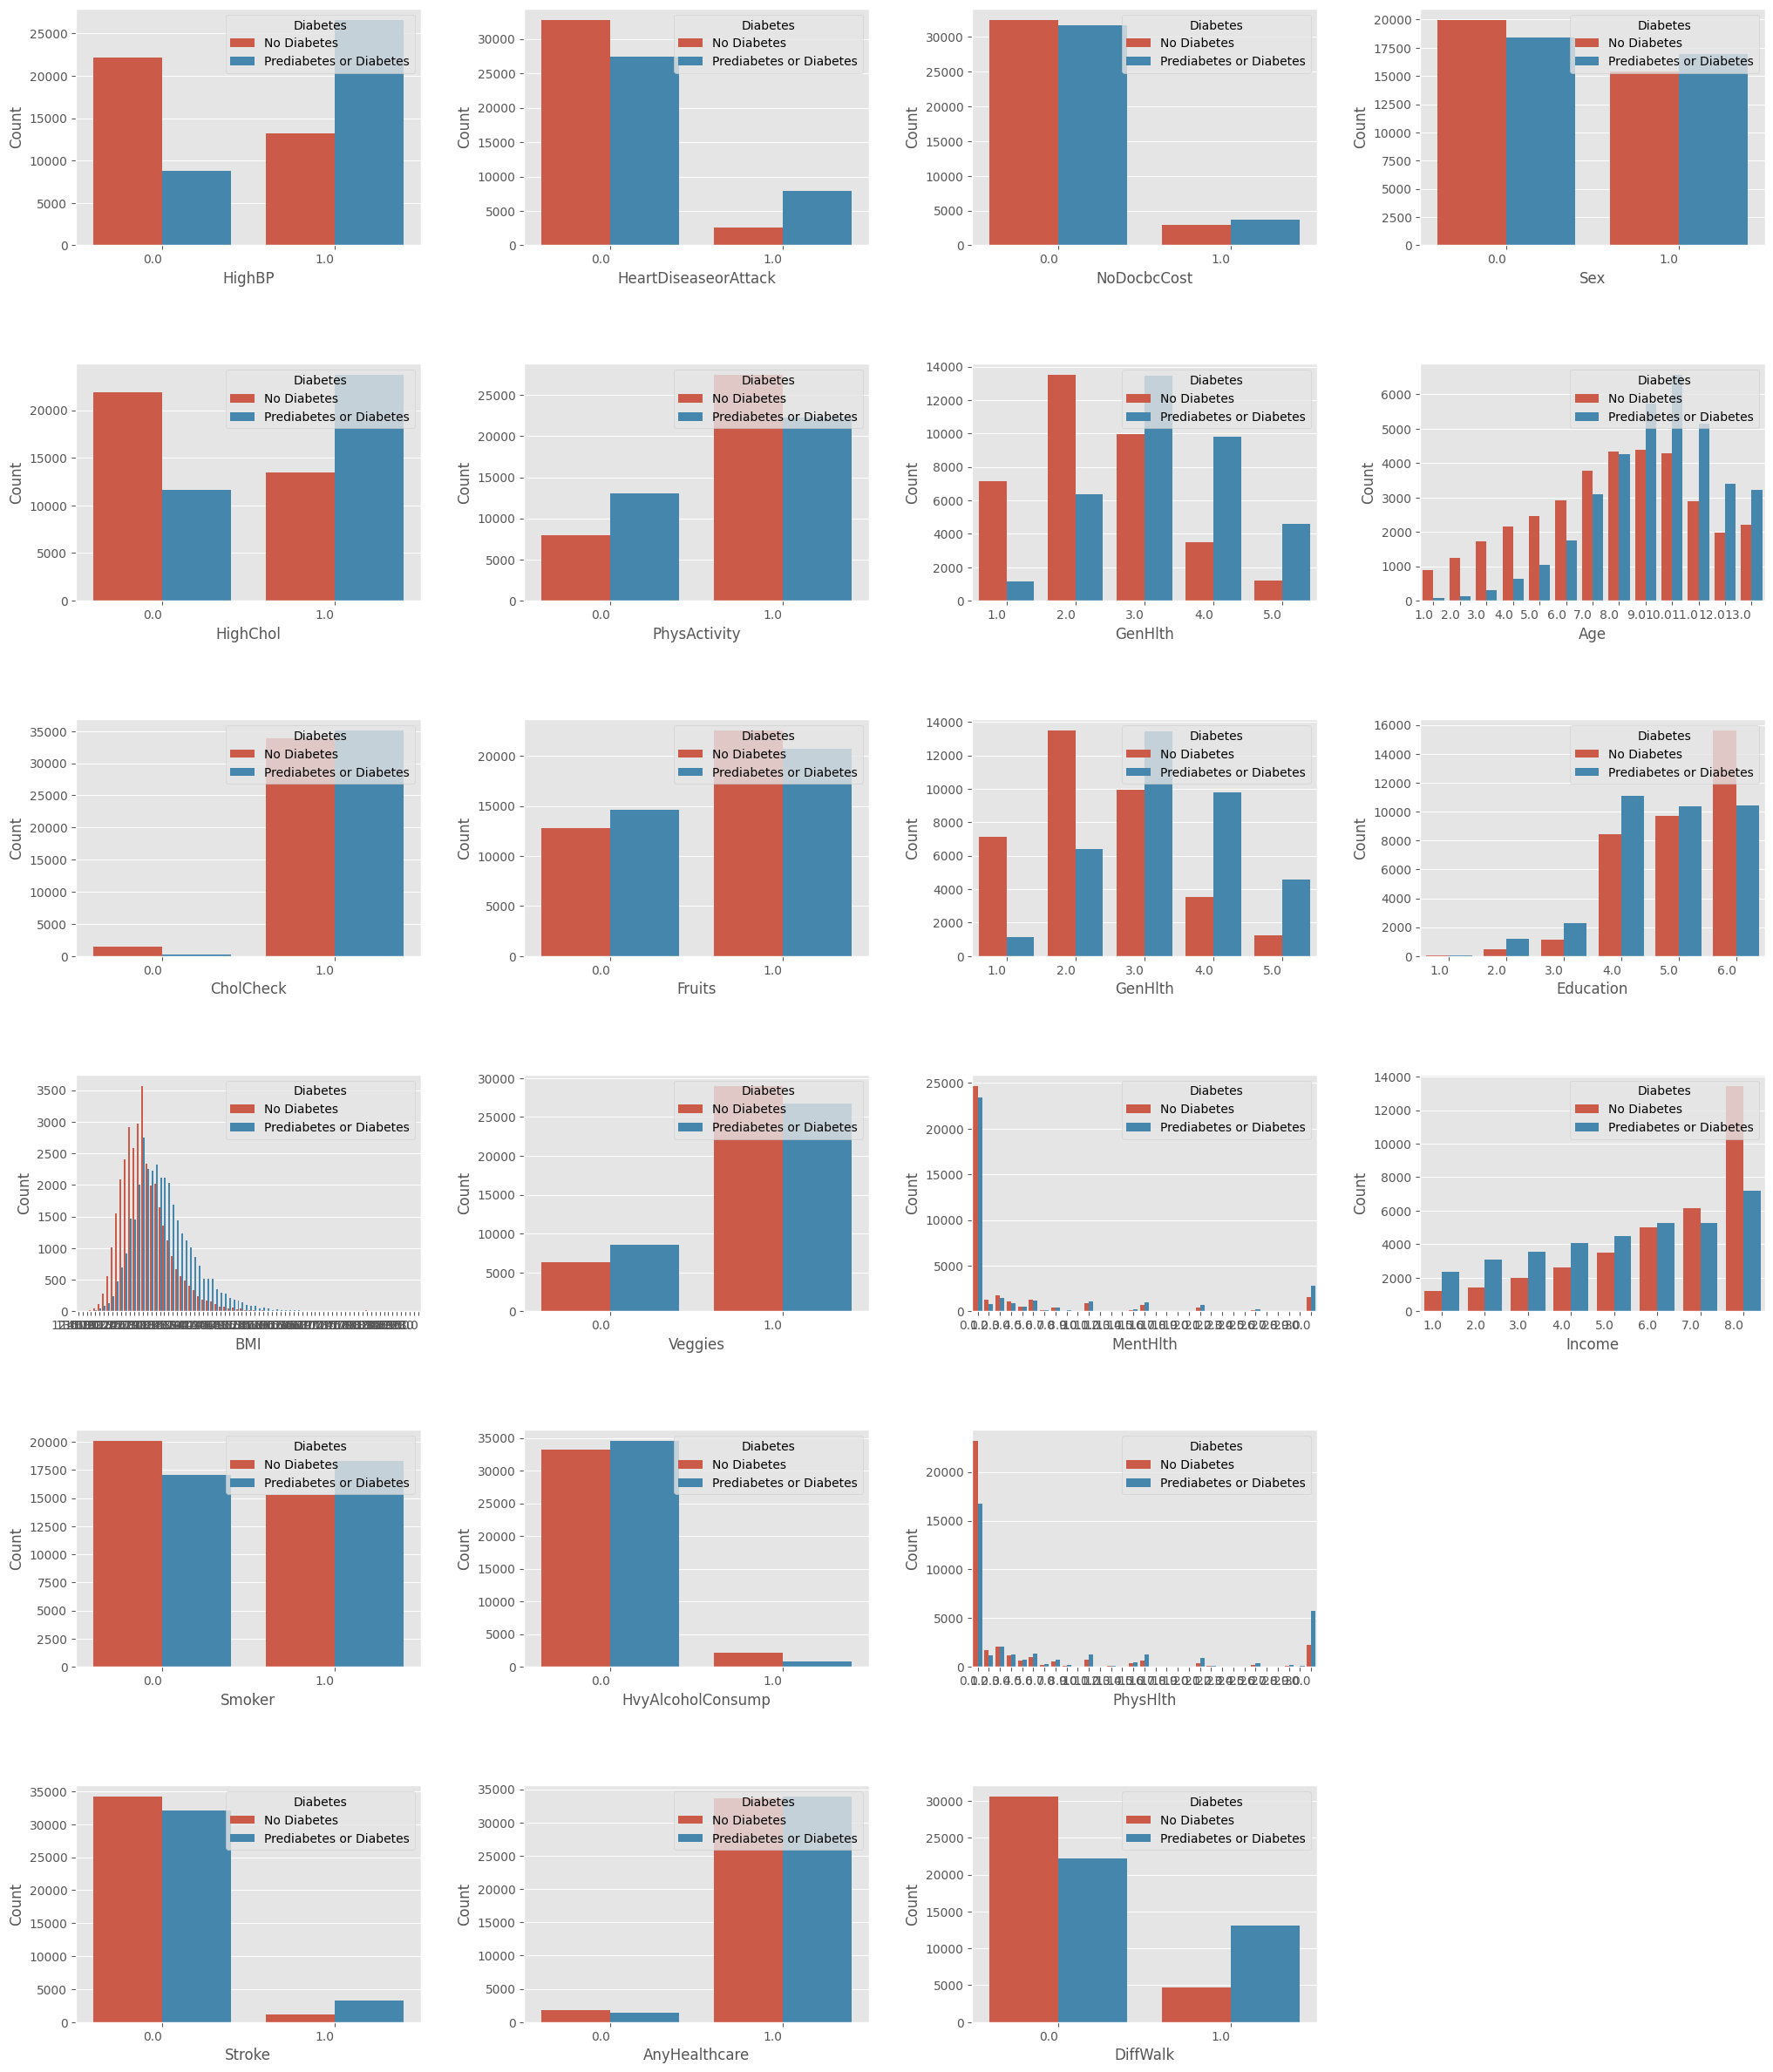

In [18]:
# Bar plot: Diabetes by predictor variables

predictors = ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump',
              'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']

fig, axes = plt.subplots(6, 4, figsize = (25, 30))

# Create bar charts for each predictor variable
for i, pred in enumerate(predictors):
    # Calculate row and column indices
    row = i % 6
    col = i // 6

    # Create bar chart for each predictor variable
    fig = sns.countplot(x = pred, hue = 'Diabetes_binary', data = diabetes_binary_5050split_health_indicators_BRFSS2015, ax = axes[row, col])
    fig.set_xticklabels(fig.get_xticklabels(), horizontalalignment = 'right')
    fig.set_xlabel(pred)
    fig.set_ylabel('Count')
    fig.legend(title = 'Diabetes', loc = 'upper right', labels = ['No Diabetes', 'Prediabetes or Diabetes'])

# Adjust the space between subplots
plt.subplots_adjust(hspace = 0.5, wspace = 0.3)

# Hide unused subplots
for j in range(i + 1, 24):
    row = j % 6
    col = j // 6
    axes[row, col].axis('off')

# Show the plot
plt.show()

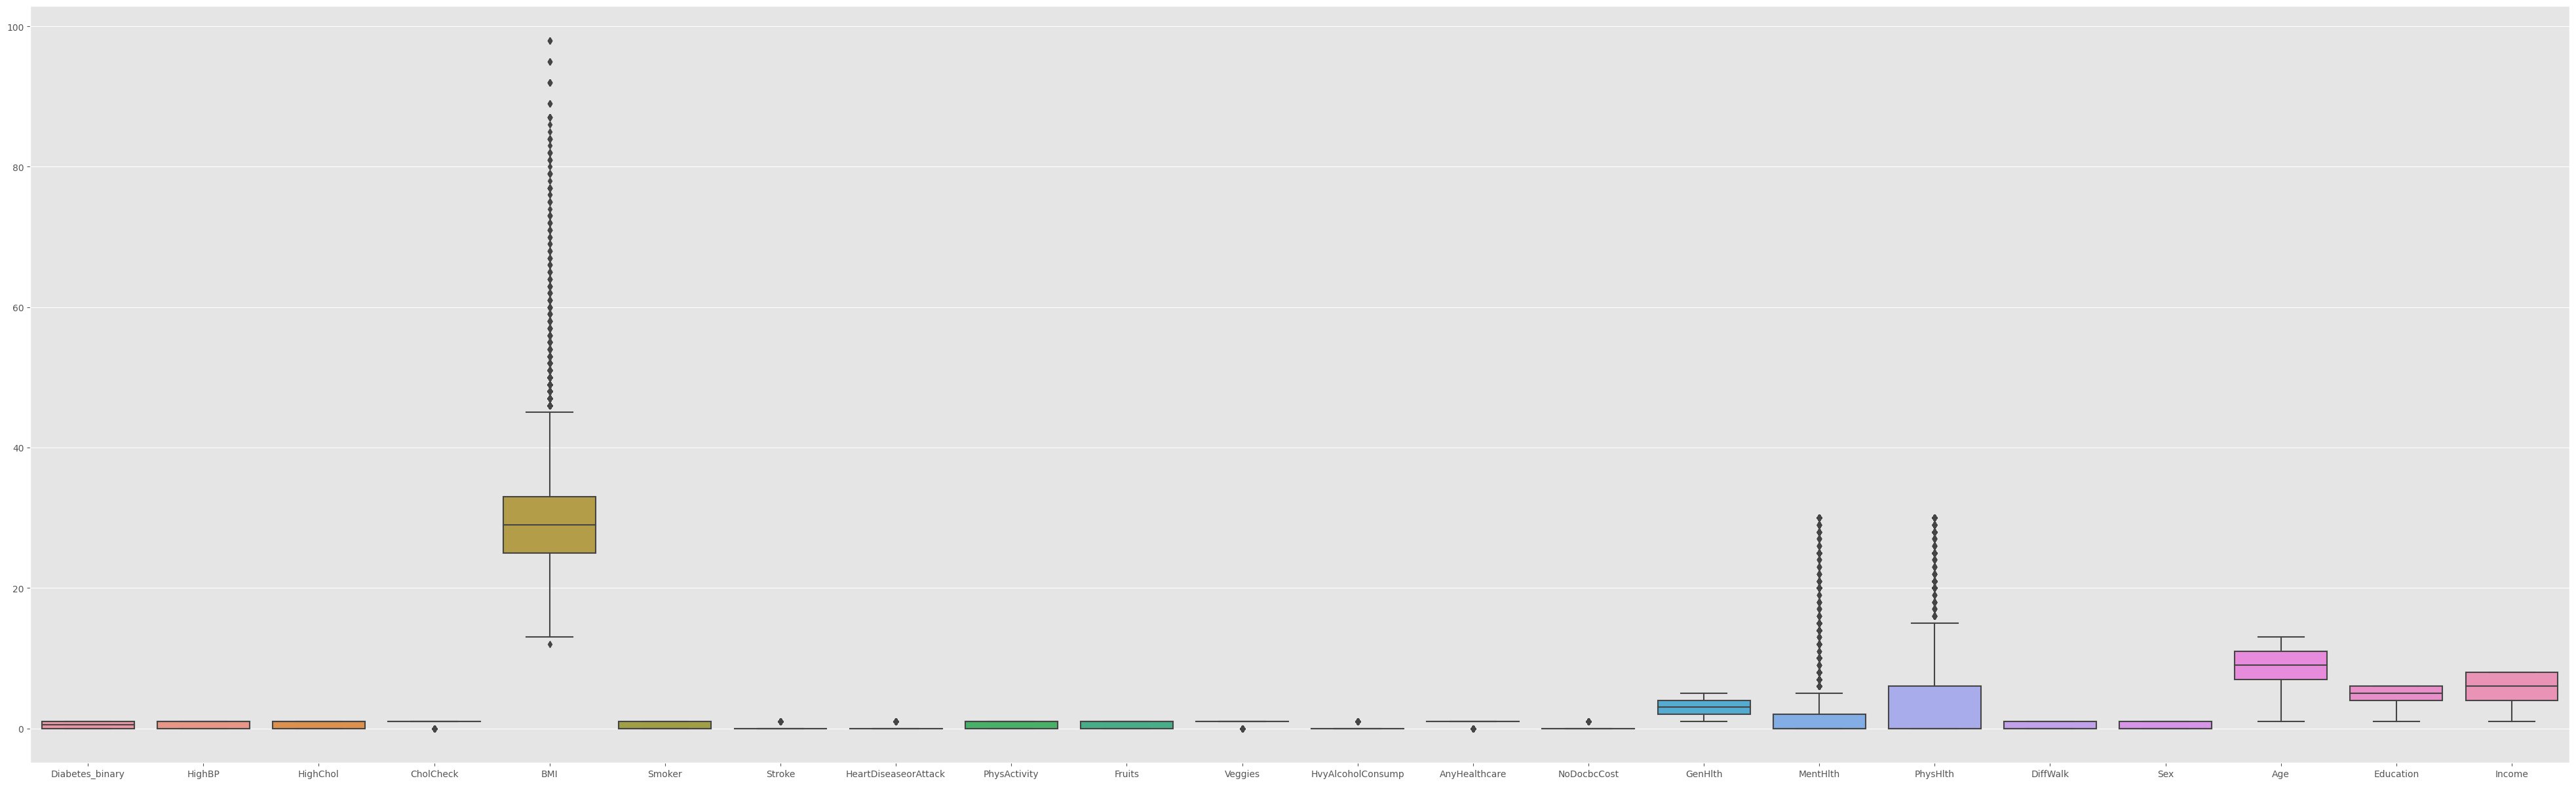

In [19]:
# Box plot: View outliers of Diabetes 50/50 Split dataframe
plt.figure(figsize = (50, 15))
sns.boxplot(data = diabetes_binary_5050split_health_indicators_BRFSS2015, orient = 'v')
plt.show()

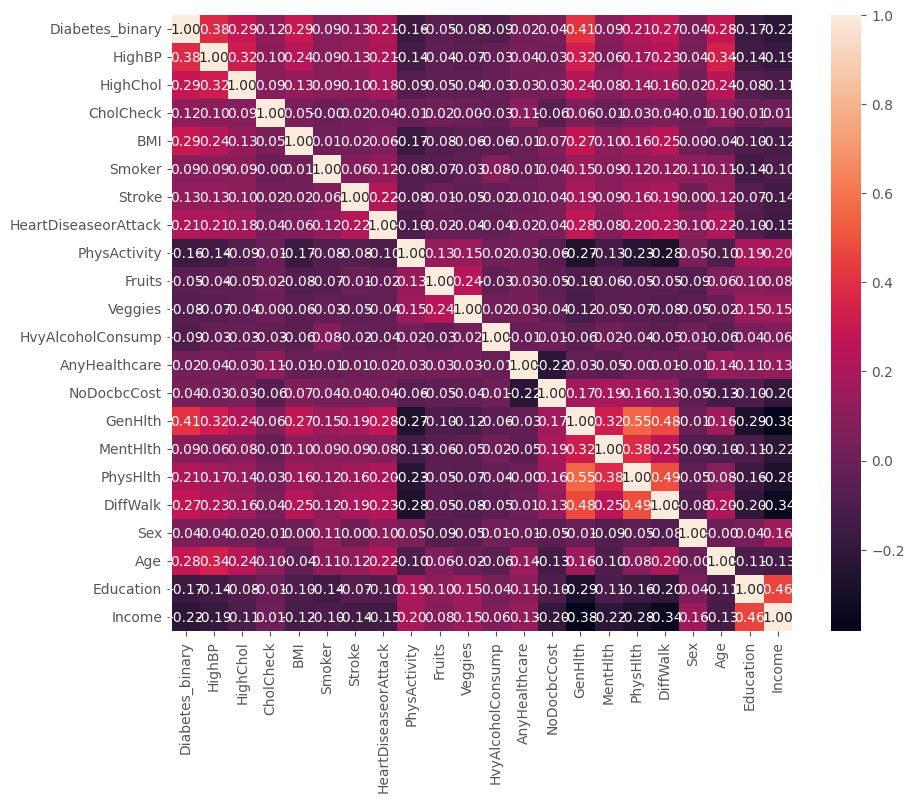

In [20]:
# Heat map: Correlation between all variables
plt.figure(figsize = (10,8))
sns.heatmap(diabetes_binary_5050split_health_indicators_BRFSS2015.corr(), annot = True, fmt = ".2f");
plt.show()